# Distribution of AirBnB Prices based on a Variety of Factors:
### Rating, Construction Year, Host Verification, Cancellation Policy, Room Type, Best/Worst Rated + Room Type 

In [1]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import cleaned_airbnb_data.csv
filepath = Path("Resources\cleaned_airbnb_data.csv")
airbnb_df = pd.read_csv(filepath)
airbnb_df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
3,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
4,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN


In [3]:
airbnb_df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                     bool
cancellation_policy                object
room type                          object
Construction year                 float64
price                               int64
service fee                       float64
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [4]:
# defining a function to create a boxplot based on two columns

def makebp(x,y):
    bp_data = []
    categories = airbnb_df[x].unique()
    categories_sorted = np.sort(categories)
    num = len(categories_sorted)
    length_list = []
    median_list = []
    mean_list = []
    min_list = []
    max_list = []
    for z in range(num):
        category_data = airbnb_df.loc[airbnb_df[x] == categories_sorted[z], [y]]
        bp_data.append(category_data)
        length = int(bp_data[z].count())
        length_list.append(length)
        if length > 0:
            median = int(bp_data[z].median())    
            mean = int(bp_data[z].mean())
            mini = int(bp_data[z].min())
            maxi = int(bp_data[z].max())
        else:
            median = 0
            mean = 0
            mini= 0
            maxi= 0
        median_list.append(median)
        mean_list.append(mean)
        min_list.append(mini)
        max_list.append(maxi)
    summary_df = pd.DataFrame({"Property Count":length_list, "Median": median_list, 
                               "Mean":mean_list, "Minimum":min_list, "Maximum":max_list})
    summary_df.index = [categories_sorted]
    summary_df = summary_df.rename_axis(x)
    display(summary_df)
    j=1
    for k in range(num):
        y_val = bp_data[k]
        plt.boxplot(y_val, positions=[j], widths=0.6)
        j=j+1
    plt.ylabel(y)
    plt.xlabel(x)
    x_axis = np.arange(1,(num+1),1)
    plt.xticks(x_axis, categories_sorted)
    plt.show


,Property Count,Median,Mean,Minimum,Maximum
review rate number,,,,,
1,7019,637,631,50,1200
2,18684,632,629,50,1200
3,18794,628,625,50,1200
4,18817,625,626,50,1200
5,18792,618,622,50,1200


Text(0.5, 1.0, 'Price by Review Rating')

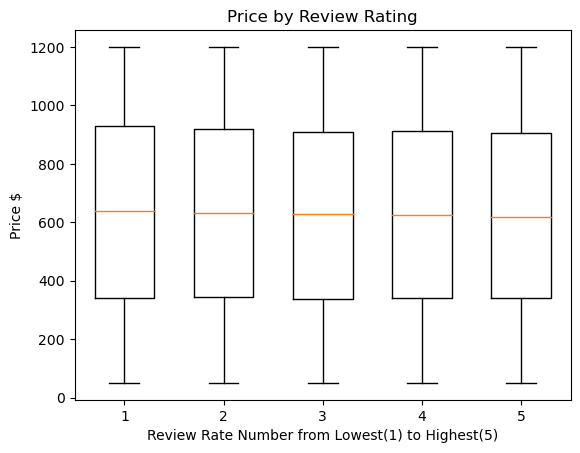

In [5]:
# Price by Review Rating
airbnb_df = airbnb_df.astype({'review rate number': "int64"})
x = 'review rate number'
y = 'price'
makebp(x,y)
plt.ylabel("Price $")
plt.xlabel("Review Rate Number from Lowest(1) to Highest(5)")
plt.title("Price by Review Rating")

,Property Count,Median,Mean,Minimum,Maximum
host_identity_verified,,,,,
unconfirmed,41062,627,627,50,1200
verified,41044,625,626,50,1200


Text(0.5, 1.0, 'Price by Host Verification Status')

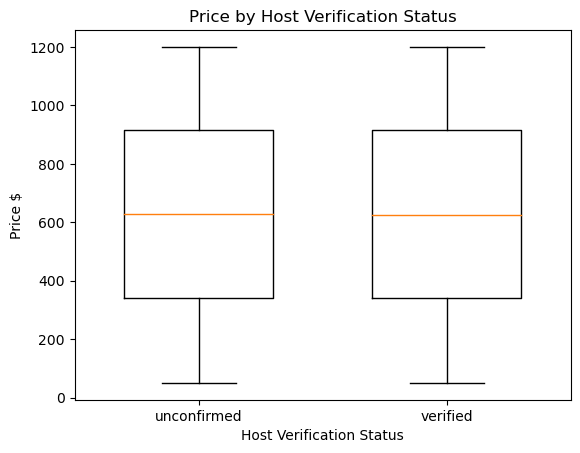

In [6]:
# Price by Host Verification
x = 'host_identity_verified'
y = 'price'
makebp(x,y)
plt.ylabel("Price $")
plt.xlabel("Host Verification Status")
plt.title("Price by Host Verification Status")

,Property Count,Median,Mean,Minimum,Maximum
cancellation_policy,,,,,
flexible,27291,629,628,50,1200
moderate,27479,622,625,50,1200
strict,27336,628,626,50,1200


Text(0.5, 1.0, 'Price by Cancellation Policy')

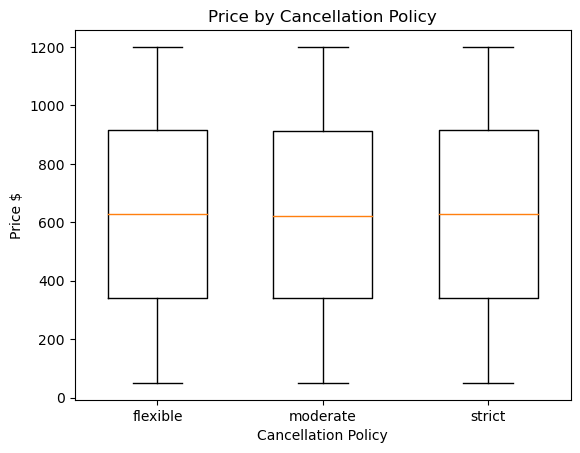

In [7]:
# Price by Cancellation Policy
x = 'cancellation_policy'
y = 'price'
makebp(x,y)
plt.ylabel("Price $")
plt.xlabel("Cancellation Policy")
plt.title("Price by Cancellation Policy")

,Property Count,Median,Mean,Minimum,Maximum
Construction year,,,,,
2003,4095,626,623,50,1200
2004,4035,643,633,50,1199
2005,4103,626,623,50,1200
2006,4208,630,630,50,1199
2007,4074,633,630,50,1200
2008,4218,638,639,50,1200
2009,4120,627,622,50,1200
2010,4120,615,620,50,1200
2011,4064,632,634,50,1200


Text(0.5, 1.0, 'Price by Construction Year')

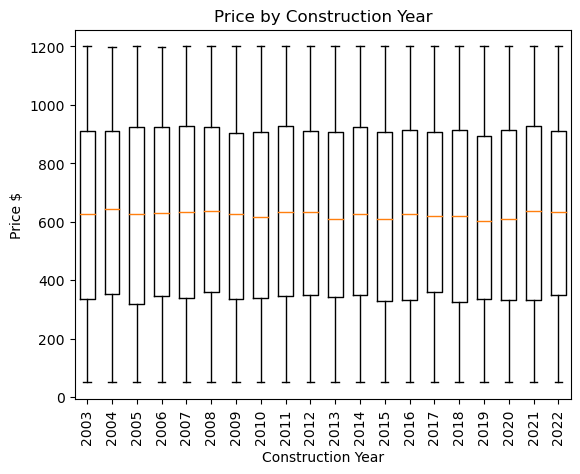

In [8]:
# change 'Construction year' from float to int
airbnb_df = airbnb_df.astype({'Construction year': "int64"})

x = 'Construction year'
y = 'price'
makebp(x,y)
plt.ylabel("Price $")
plt.xlabel("Construction Year")
plt.xticks(rotation=90)
plt.title("Price by Construction Year")

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


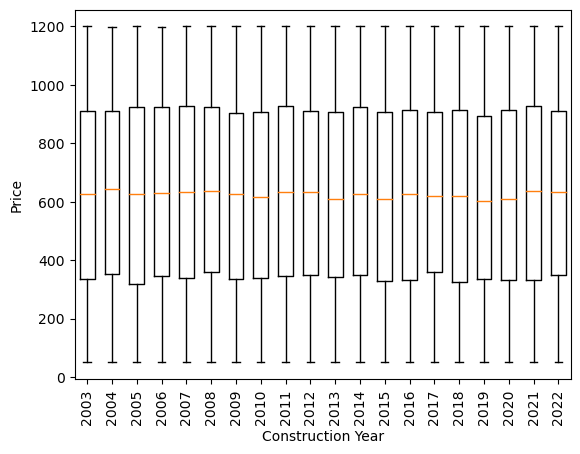

In [9]:
# Price by Construction Year
# change 'Construction year' from float to int
airbnb_df = airbnb_df.astype({'Construction year': "int64"})

# make a sorted list of years
years_unique = airbnb_df['Construction year'].unique()
sorted_years = np.sort(years_unique)
price_yearcon = []
num = airbnb_df['Construction year'].nunique()

for year in sorted_years:
    service_data = airbnb_df.loc[airbnb_df['Construction year'] == year, ['price']]
    price_yearcon.append(service_data)
    
j=1
for k in range(num):
    y = price_yearcon[k]
    x = np.random.normal(k + 1, 0.08, len(y))
    plt.boxplot(y, positions=[j], widths=0.6)
    j=j+1
plt.ylabel("Price")
plt.xlabel("Construction Year")
x_axis = np.arange(1,num+1,1)
print(x_axis)
plt.xticks(x_axis, sorted_years, rotation=90)
plt.show()


# ? Conduct t-test on the lowest median and highest median to see if it is signficant?

In [10]:
median_list = []
    
group0 = price_yearcon[0]
group1 = price_yearcon[1]
group2 = price_yearcon[2]
group3 = price_yearcon[3]
group4 = price_yearcon[4]
group5 = price_yearcon[5]
group6 = price_yearcon[6]
group7 = price_yearcon[7]
group8 = price_yearcon[8]
group9 = price_yearcon[9]
group10 = price_yearcon[10]
group11 = price_yearcon[11]
group12 = price_yearcon[12]
group13 = price_yearcon[13]
group14 = price_yearcon[14]
group15 = price_yearcon[15]
group16 = price_yearcon[16]
group17 = price_yearcon[17]
group18 = price_yearcon[18]
group19 = price_yearcon[19]
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8,
              group9, group10, group11, group12, group13, group14, group15, group16, group17, group18, group19)

F_onewayResult(statistic=array([1.66813787]), pvalue=array([0.03384435]))

,Property Count,Median,Mean,Minimum,Maximum
room type,,,,,
Entire home/apt,43335,625,625,50,1200
Hotel room,113,643,668,50,1193
Private room,37023,626,627,50,1200
Shared room,1635,656,629,50,1199


Text(0.5, 1.0, 'Price by Room Type')

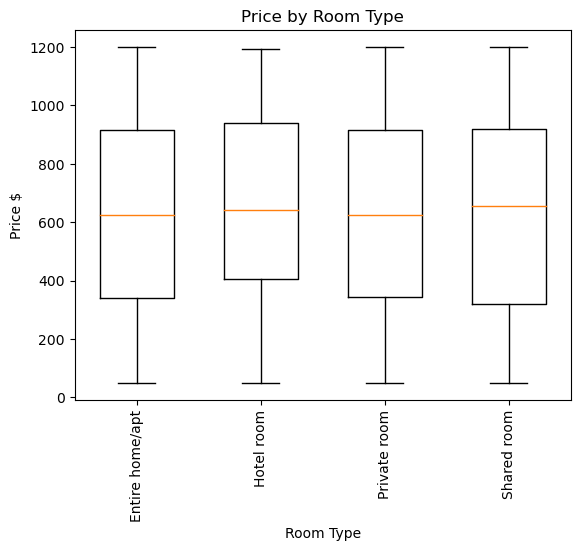

In [11]:
# Price by Room Type
x = 'room type'
y = 'price'
makebp(x,y)
plt.ylabel("Price $")
plt.xlabel("Room Type")
plt.xticks(rotation=90)
plt.title("Price by Room Type")

In [12]:
# Defining a function for boxplot with additional column and variable
def makebp_4var(v, w, x, y):
    bp_data = []
    categories = airbnb_df[x].unique()
    categories_sorted = np.sort(categories)
    num = len(categories_sorted)
    length_list = []
    median_list = []
    mean_list = []
    min_list = []
    max_list = []
    for z in range(num):
        category_data = airbnb_df.loc[(airbnb_df[x] == categories_sorted[z]) & (airbnb_df[v] == w), [y]]
        bp_data.append(category_data)
        
        # Creating List of Summary Statistics for a DataFrame
        length = int(bp_data[z].count())
        length_list.append(length)
        if length > 0:
            median = int(bp_data[z].median())    
            mean = int(bp_data[z].mean())
            mini = int(bp_data[z].min())
            maxi = int(bp_data[z].max())
        else:
            median = 0
            mean = 0
            mini=0
            maxi=0
        median_list.append(median)
        mean_list.append(mean)
        min_list.append(mini)
        max_list.append(maxi)
    summary_df = pd.DataFrame({"Property Count":length_list, "Median": median_list, 
                               "Mean":mean_list, "Minimum":min_list, "Maximum":max_list})
    summary_df.index = [categories_sorted]
    summary_df = summary_df.rename_axis(x)
    display(summary_df)
    j=1
    for k in range(num):
        y_val = bp_data[k]
        x_val = np.random.normal(k + 1, 0.08, len(y_val))
        plt.boxplot(y_val, positions=[j], widths=0.6)
        plt.scatter(x_val,y_val, alpha=0.5)
        j=j+1
    plt.ylabel(y)
    plt.xlabel(x)
    x_axis = np.arange(1,(num+1),1)
    plt.xticks(x_axis, categories_sorted)
    plt.show

,Property Count,Median,Mean,Minimum,Maximum
room type,,,,,
Entire home/apt,9873,610,620,50,1200
Hotel room,32,673,666,157,1149
Private room,8523,624,624,50,1200
Shared room,364,644,621,51,1194


Text(0.5, 1.0, 'Price by Room Type for Properties Rated at 5 (Best)')

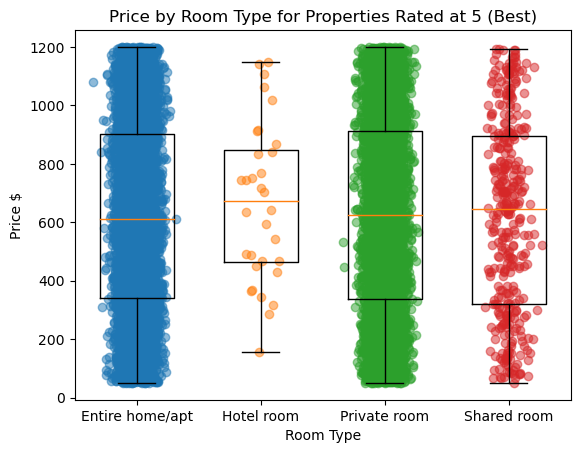

In [13]:
v = 'review rate number'
w = 5
x = 'room type'
y = 'price'
makebp_4var(v, w, x, y)
plt.ylabel("Price $")
plt.xlabel("Room Type")
plt.title("Price by Room Type for Properties Rated at 5 (Best)")

,Property Count,Median,Mean,Minimum,Maximum
room type,,,,,
Entire home/apt,3819,631,628,50,1200
Hotel room,0,0,0,0,0
Private room,3093,638,631,50,1200
Shared room,107,766,702,50,1199


Text(0.5, 1.0, 'Price by Room Type for Properties Rated at 1 (Worst)')

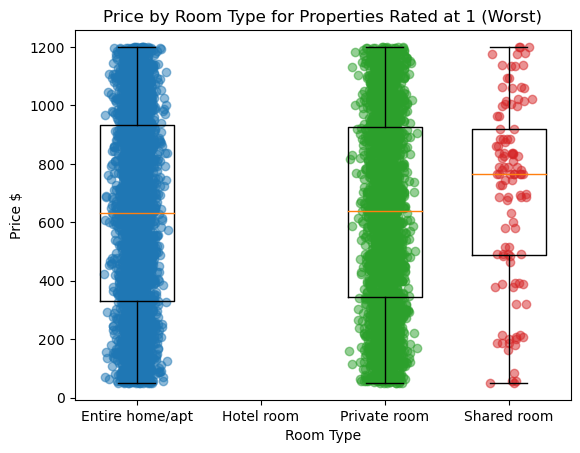

In [14]:
v = 'review rate number'
w = 1
x = 'room type'
y = 'price'
makebp_4var(v, w, x, y)
plt.ylabel("Price $")
plt.xlabel("Room Type")
plt.title("Price by Room Type for Properties Rated at 1 (Worst)")

In [15]:
# remove rows with service fee at zero
airbnb_df = airbnb_df.loc[airbnb_df['service fee'] >0,:]
airbnb_df.reset_index(drop=True)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4,1.0,322.0,NaN,NaN
3,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
4,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,212.0,45.0,49.0,2017-10-05,0.40,5,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81901,57358028,"Room in Queens, NY, near LGA.",56457739998,verified,Sonia,Queens,East Elmhurst,40.76245,-73.87938,United States,...,196.0,1.0,239.0,2019-06-29,8.58,2,2.0,361.0,1. Please clean-up after yourself in the kitch...,NaN
81902,57358580,Cozy home away from home,60176837202,verified,NaN,Queens,Edgemere,40.59380,-73.77373,United States,...,189.0,1.0,76.0,2019-06-27,2.84,1,1.0,324.0,NaN,NaN
81903,57359133,Central Park Views - Private Room & Bathroom,68411243647,verified,NaN,Manhattan,Upper West Side,40.79712,-73.96117,United States,...,141.0,1.0,4.0,2017-08-15,0.14,4,1.0,0.0,My roommates and I take a lot of pride in keep...,NaN
81904,57359685,Ultimate 50th Floor Downtown Penthouse - 4000...,95625271612,verified,NaN,Manhattan,SoHo,40.72318,-74.00223,United States,...,209.0,2.0,21.0,2019-07-01,0.74,4,2.0,343.0,#NAME?,NaN


,Property Count,Median,Mean,Minimum,Maximum
Construction year,,,,,
2003,4086,125,124,10,240
2004,4024,129,126,10,240
2005,4098,125,124,10,240
2006,4203,126,126,10,240
2007,4064,127,126,10,240
2008,4204,128,127,10,240
2009,4110,125,124,10,240
2010,4110,123,124,10,240
2011,4058,126,126,10,240


Text(0.5, 1.0, 'Service Fee by Construction Year')

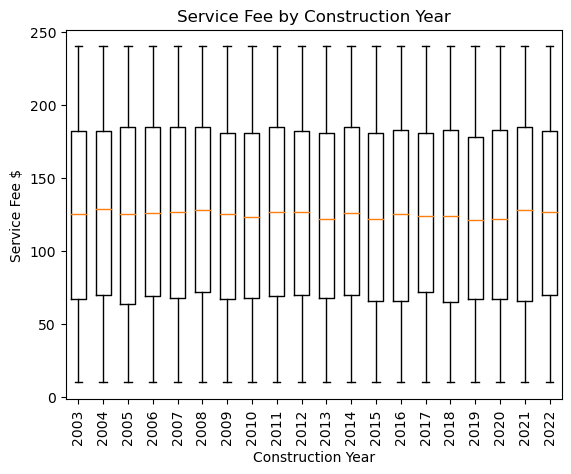

In [16]:
# box plots of service fees based on year of construction
x = 'Construction year'
y = 'service fee'
makebp(x,y)
plt.ylabel("Service Fee $")
plt.xlabel("Construction Year")
plt.xticks(rotation=90)
plt.title("Service Fee by Construction Year")


In [17]:
def lin_reg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_value = x * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    yplacement = y.max()-((y.max()-y.min())/10)
    xplacement = x.min()+((x.max()-x.min())/10)
    return plt.scatter(x,y,alpha=0.5),plt.plot(x, regress_value, "r-"), plt.annotate(line_eq, (xplacement,yplacement), fontsize=12, color='red', weight='bold'), print(f'The r-value is: {rvalue}')
    

The r-value is: 0.9999908975794347


Text(0.5, 1.0, 'Service Fee vs Price')

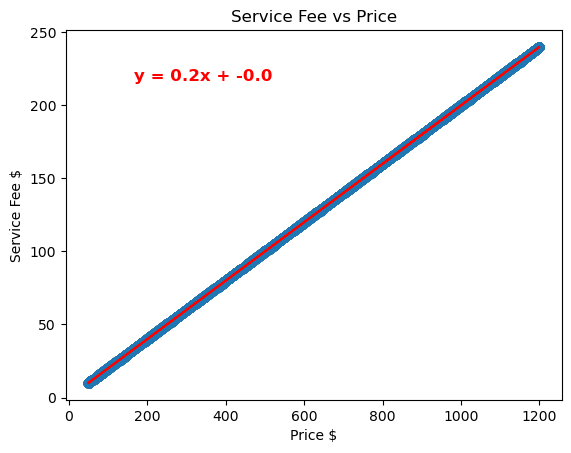

In [19]:
x = airbnb_df["price"]
y = airbnb_df['service fee']
lin_reg(x,y)
plt.xlabel("Price $")
plt.ylabel("Service Fee $")
plt.title("Service Fee vs Price")